# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

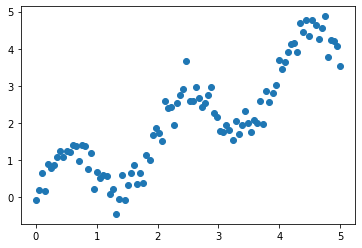

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.4939385865380536


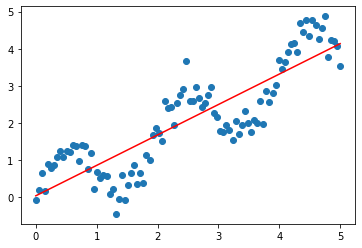

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

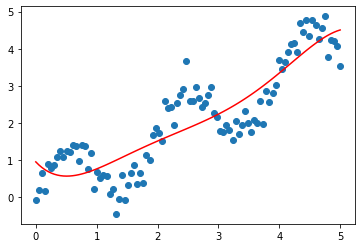

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.74390688  2.4557007  -1.11608638  0.23216934 -0.01750873]
interception:  0.9508856555544307


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
# 矩陣相乘要注意維度，不一樣的話需要轉置
np.dot(X_poly,W.T)+b

array([0.95088566, 0.86893118, 0.79866279, 0.73927134, 0.68998251,
       0.6500562 , 0.61878578, 0.59549743, 0.57954945, 0.57033155,
       0.56726417, 0.5697978 , 0.57741227, 0.58961608, 0.60594567,
       0.62596481, 0.64926381, 0.67545889, 0.70419151, 0.7351276 ,
       0.76795694, 0.80239245, 0.83816948, 0.87504515, 0.91279764,
       0.9512255 , 0.99014697, 1.02939927, 1.06883796, 1.10833616,
       1.14778395, 1.18708763, 1.22616905, 1.2649649 , 1.30342602,
       1.34151676, 1.37921421, 1.41650756, 1.45339741, 1.48989506,
       1.52602183, 1.56180837, 1.59729396, 1.63252584, 1.66755849,
       1.70245297, 1.73727621, 1.77210033, 1.80700193, 1.84206143,
       1.87736236, 1.91299067, 1.94903406, 1.98558123, 2.02272129,
       2.06054297, 2.09913399, 2.13858033, 2.1789656 , 2.22037027,
       2.26287105, 2.30654014, 2.3514446 , 2.39764561, 2.4451978 ,
       2.49414856, 2.54453735, 2.59639501, 2.64974305, 2.70459299,
       2.76094566, 2.81879049, 2.87810485, 2.93885334, 3.00098

In [17]:
Y=regr_poly.predict(X_poly)
print(Y)

[0.95088566 0.86893118 0.79866279 0.73927134 0.68998251 0.6500562
 0.61878578 0.59549743 0.57954945 0.57033155 0.56726417 0.5697978
 0.57741227 0.58961608 0.60594567 0.62596481 0.64926381 0.67545889
 0.70419151 0.7351276  0.76795694 0.80239245 0.83816948 0.87504515
 0.91279764 0.9512255  0.99014697 1.02939927 1.06883796 1.10833616
 1.14778395 1.18708763 1.22616905 1.2649649  1.30342602 1.34151676
 1.37921421 1.41650756 1.45339741 1.48989506 1.52602183 1.56180837
 1.59729396 1.63252584 1.66755849 1.70245297 1.73727621 1.77210033
 1.80700193 1.84206143 1.87736236 1.91299067 1.94903406 1.98558123
 2.02272129 2.06054297 2.09913399 2.13858033 2.1789656  2.22037027
 2.26287105 2.30654014 2.3514446  2.39764561 2.4451978  2.49414856
 2.54453735 2.59639501 2.64974305 2.70459299 2.76094566 2.81879049
 2.87810485 2.93885334 3.00098709 3.06444311 3.12914355 3.19499505
 3.26188801 3.32969595 3.39827478 3.4674621  3.53707658 3.60691716
 3.67676247 3.74637006 3.81547575 3.88379294 3.95101188 4.016799

In [18]:
mse = np.sum((Y-y)**2) / len(y)
print(mse)

0.4270318984443998


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [19]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [20]:
sigma = 0.3

In [21]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [22]:
regr_rbf = LinearRegression()

In [23]:
regr_rbf.fit(X_rbf, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

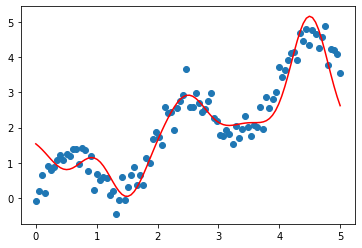

In [24]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [25]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.96453732 -1.73408382  1.14665817  0.34012244  3.37866831]
interception:  1.7778843689681643


#### Comparison

In [26]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

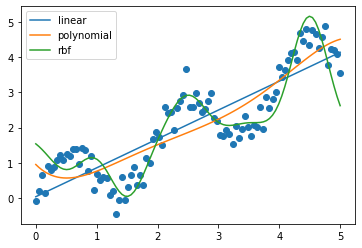

In [27]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [28]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.4939385865380536


In [29]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4270318984443998


In [30]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.24263845526454259
